<a href="https://colab.research.google.com/github/AliceAii/Education-Data-Mining/blob/main/EDM_CA2_Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Packages
import numpy as np
import pandas as pd

from numpy import loadtxt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mutual_info_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from matplotlib import pyplot
from matplotlib import pyplot as plt
import functools
import seaborn as sns; sns.set_theme()
import pickle

**Input Data Sets**
use x1, y1 to represent ca1 data, use x2, y2 to represent ca2 data

In [ ]:
df1 = pd.read_csv('ca1-dataset.csv')
df2 = pd.read_csv('ca2-dataset.csv')

In [ ]:
df2['Behaviour'].replace(to_replace=['ON TASK', 'OFF TASK'], value = [0,1])

0       0
1       0
2       0
3       0
4       0
       ..
1728    0
1729    0
1730    0
1731    1
1732    0
Name: Behaviour, Length: 1733, dtype: int64

In [ ]:
#df1, y1, x1
y1 = df1['OffTask']
y1 = y1.replace(to_replace=['N', 'Y'], value = [0,1])

x1 = df1.drop(['OffTask', 'namea', 'Unique-id'], axis=1)

#df2, y2,x2
y2 = df2['Behaviour']
y2 = y2.replace(to_replace=['ON TASK', 'OFF TASK'], value = [0,1])

x2 = df2.drop(['Behaviour', 'Unique-id', 'Row', 'lesson', 'namea', 'prod', 'cell', 'Coder'], axis=1)
print(x2)

      right  bug  help  choice  string  number  point   pknow-1   Pknow-2  \
0         1    0     0       0       0       0      0  0.888287  0.888287   
1         1    0     0       0       0       0      0 -1.000000  0.206074   
2         1    0     0       0       0       0      0  0.888287  0.888287   
3         1    0     0       0       0       0      0  0.999899  0.999899   
4         0    0     0       0       0       0      0  0.909316  0.909316   
...     ...  ...   ...     ...     ...     ...    ...       ...       ...   
1728      1    0     0       0       0       0      0  0.988464  0.988464   
1729      1    0     0       0       0       0      0  0.999712  0.999712   
1730      1    0     0       0       0       0      0  0.999899  0.999899   
1731      1    0     0       0       0       0      0  0.999992  0.999992   
1732      0    0     0       0       0       0      0 -1.000000  0.999997   

      pchange  ...  helppct-up  wrongpct-up  timeperact-up  Prev3Count-up  

**Model Selection and Feature Importance**
*   XGBoost Classifier
*   Decision Tree
*   Logistic Regression
*   Naive Bayes (The GaussianNB does not offer an intrinsic method to evaluate feature importances. So I didn't include a FI here.)

In [ ]:
#scale x2
scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)
x2_scaled = pd.DataFrame(x2_scaled)

XGBOOST Feature Importance

[0.06244451 0.         0.         0.         0.         0.
 0.         0.07606389 0.03969455 0.         0.05898597 0.06377219
 0.08477445 0.08486614 0.         0.05463072 0.         0.04174045
 0.0543826  0.1387718  0.14463817 0.         0.09523454 0.
 0.         0.        ]


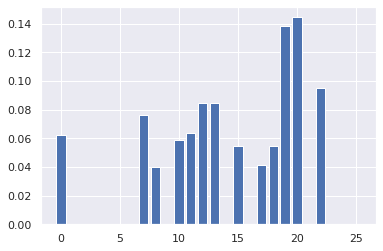

In [ ]:
#create XGB Model
modelxgb = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=777)
modelxgb.fit(x2, y2)

print(modelxgb.feature_importances_)

# plot
pyplot.bar(range(len(modelxgb.feature_importances_)), modelxgb.feature_importances_)
pyplot.show()

Decision Tree Feature Importance

[0.01227866 0.         0.         0.         0.         0.
 0.         0.01995769 0.06482472 0.         0.07524722 0.11535958
 0.13565161 0.36772696 0.         0.01032744 0.         0.
 0.17172511 0.         0.         0.         0.02690103 0.
 0.         0.        ]


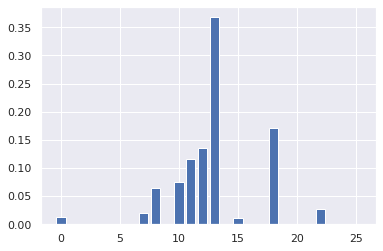

In [ ]:
modeldt = DecisionTreeClassifier(min_samples_split=10, criterion="entropy",random_state=777)
modeldt.fit(x2, y2)

print(modeldt.feature_importances_)

# plot
pyplot.bar(range(len(modeldt.feature_importances_)), modeldt.feature_importances_)
pyplot.show()

Logistic Regression Feature Importance

0    -0.267944
1    -0.192451
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.608893
8     0.169514
9     0.557784
10    0.011696
11   -0.358136
12    0.366445
13    0.082358
14    0.267944
15    0.217174
16    0.000000
17   -0.470118
18    0.205191
19    0.105637
20   -0.753615
21    0.000000
22    0.307347
23   -0.104745
24    0.000000
25    0.000000
dtype: float64


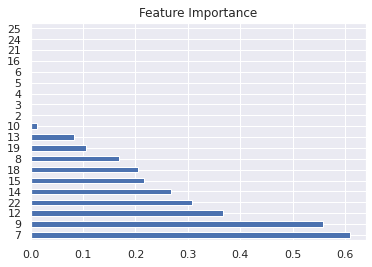

In [ ]:

modellr = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=777)
modellr.fit(x2_scaled,y2)
importance = modellr.coef_[0]

feat_importanceslr = pd.Series(importance)
print(feat_importanceslr)

#plot importance 
feat_importanceslr.nlargest(20).plot(kind='barh',title = 'Feature Importance')

**Create 14 new features**

Based on the above feature importance analysis, I selected 14 features in ca_2 dataset: 1.right, 2.pknow-1, 3.pknow-2, 4.pchange, 5. time, 6.timeSDnormed, 7.timelast3SDnormed, 8.timelast5SDnormed, 9. notright, 10.howmanywrong-up, 11.timeperact-up, 12.Prev3Count-up, 13.Prev5Count-up,  14.recent5wrong.
 
The next step is to transform them into new features.

when collating data sets, reference to Shihan's code.

In [ ]:
factor1 = pd.DataFrame(df2.groupby('Unique-id')['right'].sum().reset_index())
factor1.rename(columns={'right':'sum_right'}, inplace=True)
print(factor1)

In [ ]:
factor2 = pd.DataFrame(df2.groupby('Unique-id')['pknow-1'].mean().round(3).reset_index())
factor2.rename(columns={'pknow-1':'avg_pknow-1'}, inplace=True)
print(factor2)

In [ ]:
factor3 = pd.DataFrame(df2.groupby('Unique-id')['Pknow-2'].mean().round(3).reset_index())
factor3.rename(columns={'Pknow-2':'avg_pknow-2'}, inplace=True)
print(factor3)

In [ ]:
factor4 = pd.DataFrame(df2.groupby('Unique-id')['pchange'].sum().reset_index())
factor4.rename(columns={'pchange':'sum_pchange'}, inplace=True)
print(factor4)

In [ ]:
factor5 = pd.DataFrame(df2.groupby('Unique-id')['time'].sum().reset_index())
factor5.rename(columns={'time':'sum_time'}, inplace=True)
print(factor5)

In [ ]:
factor6 = pd.DataFrame(df2.groupby('Unique-id')['timeSDnormed'].sum().reset_index())
factor6.rename(columns={'timeSDnormed':'sum_timeSDnormed'}, inplace=True)
print(factor6)

In [ ]:
factor7 = pd.DataFrame(df2.groupby('Unique-id')['timelast3SDnormed'].sum().reset_index())
factor7.rename(columns={'time3SDnormed':'sum_timelast3SDnormed'}, inplace=True)
print(factor7)

In [ ]:
factor8 = pd.DataFrame(df2.groupby('Unique-id')['timelast5SDnormed'].sum().reset_index())
factor8.rename(columns={'timelast5SDnormed':'sum_timelast5SDnormed'}, inplace=True)
print(factor8)

In [ ]:
factor9 = pd.DataFrame(df2.groupby('Unique-id')['notright'].sum().reset_index())
factor9.rename(columns={'notright':'sum_notright'}, inplace=True)
print(factor9)

In [ ]:
factor10 = pd.DataFrame(df2.groupby('Unique-id')['howmanywrong-up'].max().reset_index())
factor10.rename(columns={'howmanywrong-up':'max_howmanywrong-up'}, inplace=True)
print(factor10)

In [ ]:
factor11 = pd.DataFrame(df2.groupby('Unique-id')['timeperact-up'].max().reset_index())
factor11.rename(columns={'timeperact-up':'max_timeperact-up'}, inplace=True)
print(factor11)

In [ ]:
factor12 = pd.DataFrame(df2.groupby('Unique-id')['Prev3Count-up'].max().reset_index())
factor12.rename(columns={'Prev3Count-up':'max_Prev3Count-up'}, inplace=True)
print(factor12)

In [ ]:
factor13 = pd.DataFrame(df2.groupby('Unique-id')['Prev5Count-up'].max().reset_index())
factor13.rename(columns={'Prev5Count-up':'max_Prev5Count-up'}, inplace=True)
print(factor13)

In [ ]:
factor14 = pd.DataFrame(df2.groupby('Unique-id')[' recent5wrong'].max().reset_index())
factor14.rename(columns={' recent5wrong':'max_recent5wrong'}, inplace=True)
print(factor14)

**Merge Features into ca1 dataset**

In [ ]:
import functools
features = [factor1, factor2, factor3, factor4, factor5, factor6, factor7, factor8, factor9, factor10, factor11, factor12, factor13, factor14]
print(features)

In [ ]:
#reference to shihan's code
new_features = functools.reduce(lambda left, right: pd.merge(left, right, on='Unique-id'), features)
print(new_features)

In [ ]:
DF1 = df1.drop([ 'Avgbug', 'Avghelp', 'Avgchoice', 'Avgstring', 'Avgnumber', 'Avgpoint', 'Avgnotright', 'Avghelppct-up', 'Avgrecent8help', 'Avgmanywrong-up', 'AvgasymptoteA-up', 'AvgasymptoteB-up'], axis=1)

ca2 = DF1.merge(new_features, on='Unique-id')
print(ca2)



In [ ]:
corrmatrix = ca2.corr()
corrmatrix

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corrmatrix, annot=True)

Manually remove variables that are covariates, remove 'AvgPre3Count-up', 'Avgtime', 'Avgtimelast5Dnormed', 'Avghowmanywrong-up', 'AvgPre3Count-up'.

In [ ]:
x = ca2.drop(['Unique-id', 'namea', 'OffTask','AvgPrev3Count-up', 'Avgtime', 'Avgtimelast5SDnormed', 'Avghowmanywrong-up', 'AvgPrev3Count-up'], axis=1)
print(x)

x1xgb = x.drop(['avg_pknow-2', 'sum_pchange', 'sum_notright'], axis=1)
x2dt = x.drop(['sum_pchange', 'sum_notright', 'max_Prev3Count-up', 'max_Prev5Count-up'], axis=1)
x3lg = x.drop(['sum_right', 'sum_time', 'max_Prev5Count-up'], axis=1)

y = ca2['OffTask']
y = y.replace(to_replace=['N', 'Y'], value = [0,1])

print(y)

**Set student-level cross validation**

In [ ]:
cv = KFold(n_splits=10)

gkf = GroupKFold(n_splits=10)

group_dict = {}
groups = np.array([])

In [ ]:
for index, row in ca2.iterrows():
    student_id = row['Unique-id']
    if student_id not in group_dict:
        group_dict[student_id] = index
    groups = np.append(groups, group_dict[student_id])

**Data Mining Model, A' and Kappa value**
*   XGBoot Classifier
*   Decision Tree
*   Naive Bayes 
*   Logistic Regression

XGBoot Classifier: kappa=0.223, A'=0.817, accuracy= 95.65%

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x1xgb, y, groups=groups):
    x1_train = x1xgb.iloc[train_index]
    x1_test = x1xgb.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    xgb = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=5)
    xgb.fit(x1_train, y_train)
    predictions = xgb.predict(x1_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
np.mean(kappa_values)

In [ ]:
#xgb

kappa_values = list()

for train_index, test_index in gkf.split(x1xgb, y, groups=groups):
    x_train = x1xgb.iloc[train_index]
    x_test = x1xgb.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    xgb = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=5)
    xgb.fit(x_train, y_train)
    predictions = xgb.predict(x_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
print('Mean:',np.mean(kappa_values)) 

In [ ]:
AUC = cross_val_score(xgb, x1xgb, y, scoring='roc_auc', cv=gkf.split(x, y, groups=groups))
print(AUC.mean())

In [ ]:
xgb = XGBClassifier()
kfold = KFold(n_splits=10, random_state=7,shuffle = True)
results = cross_val_score(xgb, x1xgb, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.65% (2.50%)


Decision Tree: kappa =0.246, A'=0.652, accuracy=93.91%

In [ ]:
# decision tree

kappa_values = list()

for train_index, test_index in gkf.split(x2dt, y, groups=groups):
    x_train = x2dt.iloc[train_index]
    x_test = x2dt.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    clf = tree.DecisionTreeClassifier(min_samples_split=10)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values
print('Mean:',np.mean(kappa_values)) 

Mean: 0.24557740272039244


In [ ]:
AUC = cross_val_score(clf, x2dt, y, scoring='roc_auc', cv=gkf.split(x, y, groups=groups))
print(AUC.mean())

0.6516431196432427


In [ ]:
cv = KFold(n_splits=10)

clf = tree.DecisionTreeClassifier(min_samples_split=10)
fold_accuracy = []
for train_index, valid_index in cv.split(x):
    train_x,test_x = x.iloc[train_index],x.iloc[valid_index]
    train_y,test_y= y.iloc[train_index], y.iloc[valid_index]

    model = clf.fit(train_x,train_y)
    valid_acc = model.score(test_x,test_y)
    fold_accuracy.append(valid_acc)
    print(confusion_matrix(test_y,model.predict(test_x)))

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))


Naive Bayes: kappa=0.131, A'=0.617, accuracy = 90.35%

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x, y, groups=groups):
    x_train = x.iloc[train_index]
    x_test = x.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    predictions = gnb.predict(x_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values
print('Mean:',np.mean(kappa_values)) 

In [ ]:
AUC = cross_val_score(gnb, x, y, scoring='roc_auc', cv=gkf.split(x, y, groups=groups))
print(AUC.mean())

In [ ]:
cv = KFold(n_splits=10)

gnb = GaussianNB()
fold_accuracy = []
for train_index, valid_index in cv.split(x):
    train_x,test_x = x.iloc[train_index],x.iloc[valid_index]
    train_y,test_y= y.iloc[train_index], y.iloc[valid_index]

    model = gnb.fit(train_x,train_y)
    valid_acc = model.score(test_x,test_y)
    fold_accuracy.append(valid_acc)
    print(confusion_matrix(test_y,model.predict(test_x)))

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Logistic Regression: kappa = 0.112, A'= 0.76, accuracy = 94.90%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3lg, y, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)

y_predict = logreg.predict(x_train)

y_predict1 = logreg.predict(x_test)

scores = cross_val_score(logreg, x_train, y_train, cv = 10) 

np.mean(scores)

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x3lg, y, groups=groups):
    x_train = x3lg.iloc[train_index]
    x_test = x3lg.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(x_train, y_train)
    predictions = logreg.predict(x_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values
print('Mean:',np.mean(kappa_values)) 

In [ ]:
AUC = cross_val_score(logreg, x3lg, y, scoring='roc_auc', cv=gkf.split(x, y, groups=groups))
print("AUC: %.2f" % (AUC.mean()))